# **Telecom X – Parte 2: Prevendo Churn**

## **ETL (Extract, Transform, Load)**


In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

In [ ]:
# Ler o arquivo JSON
df = pd.read_json('/content/telecomx_data.json')

# Verificar as primeiras linhas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Expandir colunas aninhadas
df_normalizado = pd.json_normalize(df.to_dict(orient='records'))

# Verificar estrutura final
df_normalizado.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# verificar dadaos unicos em cada coluna
for col in df_normalizado.columns:
    print(f"Coluna '{col}':")
    print(df_normalizado[col].unique())
    print("-" * 30)

Coluna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna 'Churn':
['No' 'Yes' '']
------------------------------
Coluna 'customer.gender':
['Female' 'Male']
------------------------------
Coluna 'customer.SeniorCitizen':
[0 1]
------------------------------
Coluna 'customer.Partner':
['Yes' 'No']
------------------------------
Coluna 'customer.Dependents':
['Yes' 'No']
------------------------------
Coluna 'customer.tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna 'phone.PhoneService':
['Yes' 'No']
------------------------------
Coluna 'phone.MultipleLines':
['No' 'Yes' 'No phone service']
------------------------------
Coluna 'internet.InternetService':
['DSL' 'Fiber optic' 'No']
-

In [ ]:
# Remover linhas com espaços vazios na coluna 'Churn'
df_normalizado = df_normalizado[df_normalizado['Churn'] != ''].copy()

# Verificar os valores únicos na coluna 'Churn' novamente
print("Valores únicos na coluna 'Churn' após a remoção:")
print(df_normalizado['Churn'].unique())

Valores únicos na coluna 'Churn' após a remoção:
['No' 'Yes']


In [ ]:
# Verificar se há valores nulos na coluna 'account.Charges.Total'
print("Número de valores nulos na coluna 'account.Charges.Total' antes da remoção:")
print(df_normalizado['account.Charges.Total'].isnull().sum())

# Remover linhas com valores nulos na coluna 'account.Charges.Total'
df_normalizado.dropna(subset=['account.Charges.Total'], inplace=True)

# Verificar se há valores nulos após a remoção
print("\nNúmero de valores nulos na coluna 'account.Charges.Total' após a remoção:")
print(df_normalizado['account.Charges.Total'].isnull().sum())

Número de valores nulos na coluna 'account.Charges.Total' antes da remoção:
0

Número de valores nulos na coluna 'account.Charges.Total' após a remoção:
0


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [ ]:
# Converter colunas binárias para int64
colunas_binarias = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

for col in colunas_binarias:
    df_normalizado[col] = df_normalizado[col].apply(lambda x: 1 if x == 'Yes' else 0).astype('int64')

# Converter a coluna 'account.Charges.Total' para float64
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

# Verificar os tipos de dados após as conversões
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

## **Remoção de Colunas Irrelevantes**

In [ ]:
dados = df_normalizado.drop(['customerID'], axis=1, inplace=False)

## **Encoding**

Optamos pelo **`OneHotEncoder`** em vez do `pd.get_dummies()` porque ele:

- **Integra-se ao Pipeline** e ao `ColumnTransformer`, garantindo que treino e predição usem o mesmo pré-processamento.
- **Lida com categorias novas** sem erro (`handle_unknown='ignore'`), essencial para novos clientes.
- **Mantém consistência nas colunas**, sem necessidade de ajustes manuais entre treino e teste.
- É **mais robusto e escalável** para uso em produção, especialmente em validação cruzada e ajuste de hiperparâmetros.

Essa escolha assegura **robustez, reprodutibilidade e menor risco de falhas** no pipeline de Machine Learning da Telecom X.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for col in dados.columns:
    print(f"Coluna '{col}':")
    print(dados[col].unique())
    print("-" * 30)

Coluna 'Churn':
[0 1]
------------------------------
Coluna 'customer.gender':
['Female' 'Male']
------------------------------
Coluna 'customer.SeniorCitizen':
[0 1]
------------------------------
Coluna 'customer.Partner':
[1 0]
------------------------------
Coluna 'customer.Dependents':
[1 0]
------------------------------
Coluna 'customer.tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------
Coluna 'phone.PhoneService':
[1 0]
------------------------------
Coluna 'phone.MultipleLines':
['No' 'Yes' 'No phone service']
------------------------------
Coluna 'internet.InternetService':
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna 'internet.OnlineSecurity':
['No' 'Yes' 'No internet service']
------------------------------
Coluna 'internet.OnlineBackup':
['Yes'

In [ ]:
colunas_categoricas = ['customer.gender',
                      'phone.MultipleLines',
                      'internet.InternetService',
                      'internet.OnlineSecurity',
                      'internet.OnlineBackup',
                      'internet.DeviceProtection',
                      'internet.TechSupport',
                      'internet.StreamingTV',
                      'internet.StreamingMovies',
                      'account.Contract',
                      'account.PaymentMethod'
                      ]

In [ ]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(dados)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

,onehotencoder__customer.gender_Female,onehotencoder__customer.gender_Male,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_No,onehotencoder__internet.OnlineSecurity_No internet service,...,onehotencoder__account.PaymentMethod_Mailed check,remainder__Churn,remainder__customer.SeniorCitizen,remainder__customer.Partner,remainder__customer.Dependents,remainder__customer.tenure,remainder__phone.PhoneService,remainder__account.PaperlessBilling,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7039,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7040,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7041,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


In [ ]:
dados_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__customer.gender_Female                           7043 non-null   float64
 1   onehotencoder__customer.gender_Male                             7043 non-null   float64
 2   onehotencoder__phone.MultipleLines_No                           7043 non-null   float64
 3   onehotencoder__phone.MultipleLines_No phone service             7043 non-null   float64
 4   onehotencoder__phone.MultipleLines_Yes                          7043 non-null   float64
 5   onehotencoder__internet.InternetService_DSL                     7043 non-null   float64
 6   onehotencoder__internet.InternetService_Fiber optic             7043 non-null   float64
 7   onehotencoder__internet.InternetService_No         

## **Verificação da Proporção de Evasão**

In [ ]:
dados['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
dados['Churn'].value_counts(normalize=True).round(2) * 100

,proportion
Churn,
0,73.0
1,27.0


In [ ]:
import plotly.express as px

# Calcular a quantidade de churn
dados_churn_count = dados['Churn'].value_counts().reset_index()
dados_churn_count.columns = ['Churn', 'Quantidade']

# Mapear valores para rótulos mais descritivos
dados_churn_count['Classe'] = dados_churn_count['Churn'].map({0: 'Clientes Ativos', 1: 'Clientes Evasão'})

# Gráfico de barras com quantidade
fig = px.bar(dados_churn_count, x='Classe', y='Quantidade', text='Quantidade',
             color='Classe', color_discrete_sequence=px.colors.qualitative.Set2,
             title='Quantidade de Clientes: Evasão vs Ativos')

fig.update_layout(xaxis_title='', yaxis_title='Quantidade de Clientes')
fig.update_traces(textposition='outside')

fig.show()

## **Análise de Correlação**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados_numericos = dados.select_dtypes(include=['int64', 'float64'])
dados_numericos

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
0,0,0,1,1,9,1,1,65.60,593.30
1,0,0,0,0,9,1,0,59.90,542.40
2,1,0,0,0,4,1,1,73.90,280.85
3,1,1,1,0,13,1,1,98.00,1237.85
4,1,1,1,0,3,1,1,83.90,267.40
...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,55.15,742.90
7263,1,0,1,0,22,1,1,85.10,1873.70
7264,0,0,0,0,2,1,1,50.30,92.75
7265,0,0,1,1,67,1,0,67.85,4627.65


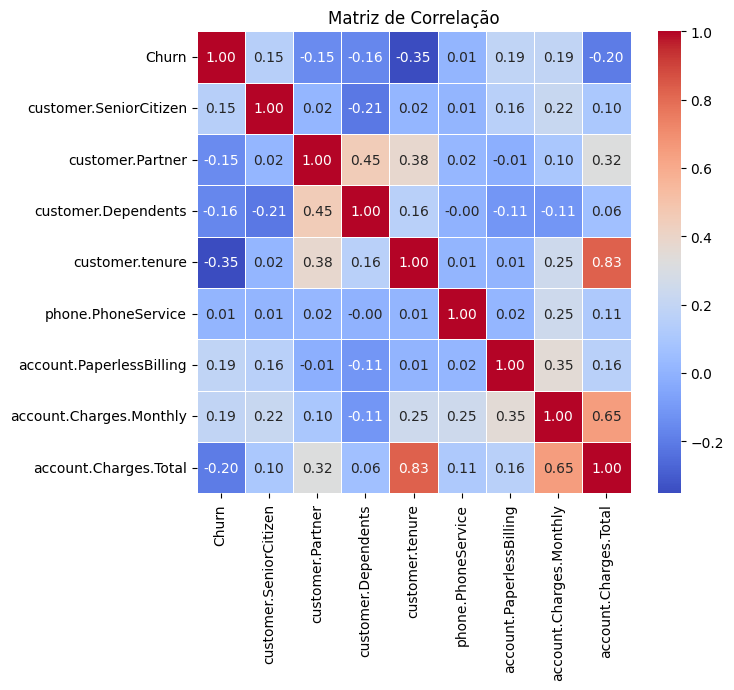

In [ ]:
plt.figure(figsize=(7, 6))
sns.heatmap(dados_numericos.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## **Análises Direcionadas**
Tempo de contrato × Evasão

Total gasto × Evasão

In [ ]:
fig = px.box(dados, x='Churn', y='customer.tenure',
             color='Churn', color_discrete_sequence=px.colors.qualitative.Set2,
             title='Tempo de Contrato vs. Churn')

# Mapear valores de Churn para rótulos
fig.update_xaxes(tickvals=[0, 1], ticktext=['Clientes Ativos', 'Clientes Evasão'], title='Evasão de clientes')
fig.update_yaxes(title='Tempo de contrato (meses)')

fig.update_layout(width=800, height=600)

fig.show()

In [ ]:
fig = px.box(dados, x='Churn', y='account.Charges.Total',
             color='Churn', color_discrete_sequence=px.colors.qualitative.Set2,
             title='Total Gasto vs. Churn')

# Mapear valores de Churn para rótulos
fig.update_xaxes(tickvals=[0, 1], ticktext=['Clientes Ativos', 'Clientes Evasão'], title='Evasão de clientes')
fig.update_yaxes(title='Total de gastos (R$)')

fig.update_layout(width=800, height=600)

fig.show()

In [ ]:
fig = px.scatter(dados, x='customer.tenure', y='account.Charges.Total', color=dados['Churn'].astype(str),
                 color_discrete_sequence=px.colors.qualitative.Set2,
                 title='Tempo de Contrato vs. Total Gasto por Churn')

fig.update_layout(xaxis_title='Tempo de Contrato (meses)', yaxis_title='Total Gasto (R$)')

fig.show()

## **Modelagem Preditiva**

In [ ]:
print("Valores nulos por coluna:\n")
print(dados_encoded.isnull().sum())

Valores nulos por coluna:

onehotencoder__customer.gender_Female                              0
onehotencoder__customer.gender_Male                                0
onehotencoder__phone.MultipleLines_No                              0
onehotencoder__phone.MultipleLines_No phone service                0
onehotencoder__phone.MultipleLines_Yes                             0
onehotencoder__internet.InternetService_DSL                        0
onehotencoder__internet.InternetService_Fiber optic                0
onehotencoder__internet.InternetService_No                         0
onehotencoder__internet.OnlineSecurity_No                          0
onehotencoder__internet.OnlineSecurity_No internet service         0
onehotencoder__internet.OnlineSecurity_Yes                         0
onehotencoder__internet.OnlineBackup_No                            0
onehotencoder__internet.OnlineBackup_No internet service           0
onehotencoder__internet.OnlineBackup_Yes                           0
onehote

In [ ]:
dados_encoded.dropna(inplace=True)

In [ ]:
# Separar dados de treino e teste
from sklearn.model_selection import train_test_split
X = dados_encoded.drop('remainder__Churn', axis=1)
y = dados_encoded['remainder__Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Balanceamento

Durante a etapa de preparação dos dados, foi identificado um desbalanceamento significativo entre as classes, cenário comum em problemas de previsão de churn, nos quais a proporção de clientes que cancelam é substancialmente menor que a de clientes que permanecem. Esse desnível pode levar o modelo a aprender padrões enviesados, reduzindo sua capacidade de identificar casos de churn de forma eficaz.

Para lidar com essa limitação, optou-se pela técnica **SMOTE**, que diferentemente do oversampling tradicional, gera instâncias sintéticas da classe minoritária a partir de combinações interpoladas de observações reais, preservando melhor a variabilidade dos dados e evitando a simples duplicação de registros.

Essa estratégia contribui para um aprendizado mais equilibrado, aumentando a sensibilidade do modelo e melhorando sua capacidade de generalização em cenários reais.


----

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Aplicando o SMOT
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Antes:")
print(y_train.value_counts(normalize=True))

print("\nDepois:")
print(y_res.value_counts(normalize=True))

Antes:
remainder__Churn
0.0    0.734254
1.0    0.265746
Name: proportion, dtype: float64

Depois:
remainder__Churn
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


### Padronização

A padronização dos dados é uma etapa fundamental no pré-processamento, especialmente quando o conjunto de variáveis apresenta escalas distintas.

Essa discrepância pode levar algoritmos sensíveis à magnitude, como Regressão Logística, Support Vector Machines e Redes Neurais, a atribuir maior importância a atributos de maior amplitude, distorcendo o processo de aprendizado.

Ao aplicar técnicas como a normalização Z-score, cada variável é transformada para média zero e desvio padrão unitário, garantindo que todas contribuam de forma equilibrada para o modelo. Além de prevenir vieses decorrentes da escala, a padronização melhora a estabilidade numérica, acelera a convergência de algoritmos iterativos e aumenta a consistência dos resultados preditivos, sendo, portanto, uma prática indispensável para análises robustas e comparáveis.


-----

In [ ]:
# Aplicando a padronizaçao dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

### Modelos escolhidos

`LogisticRegression`

`RandomForest`

Optou-se por avaliar os algoritmos Logistic Regression e Random Forest devido às suas características complementares e à relevância comprovada em problemas de classificação binária, como a previsão de churn.

A **Regressão Logística** oferece uma abordagem estatística interpretável, permitindo estimar a probabilidade de evasão e identificar a contribuição individual de cada variável, o que facilita a análise de fatores associados ao cancelamento.

Já o **Random Fores**t, por ser um modelo baseado em múltiplas árvores de decisão, apresenta maior capacidade de capturar relações não lineares e interações complexas entre atributos, além de ser robusto a outliers e a variáveis irrelevantes. Ao comparar o desempenho de ambos, busca-se identificar qual modelo proporciona melhor equilíbrio entre interpretabilidade, precisão e capacidade de generalização, selecionando aquele mais adequado para prever o churn de forma confiável e operacionalmente viável.


----

#### Métricas de avaliação usadas

> **Acurácia** - Proporção de previsões corretas em relação ao total de observações. É uma métrica global, útil principalmente quando as classes estão balanceadas.

> **Precisão** - Proporção de previsões positivas corretas dentre todas as classificadas como positivas pelo modelo. Indica a capacidade de evitar falsos positivos.

> **Recall** - Proporção de casos positivos corretamente identificados dentre todos os positivos reais. É crucial para reduzir a ocorrência de falsos negativos.

> **F1-score** - Média harmônica entre precisão e recall, equilibrando ambas as métricas. É especialmente relevante em cenários com desbalanceamento de classes.

> **Matriz de confusão** - Representação tabular que mostra a distribuição de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos, permitindo identificar padrões de erro específicos do modelo.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

#### Modelo Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_Regressao_log = LogisticRegression(random_state=42)
modelo_Regressao_log.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

Relatório de Classificação:
              precision    recall  f1-score   support

   Permanece       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontuação AUC: 0.8444

Matriz de Confusão:


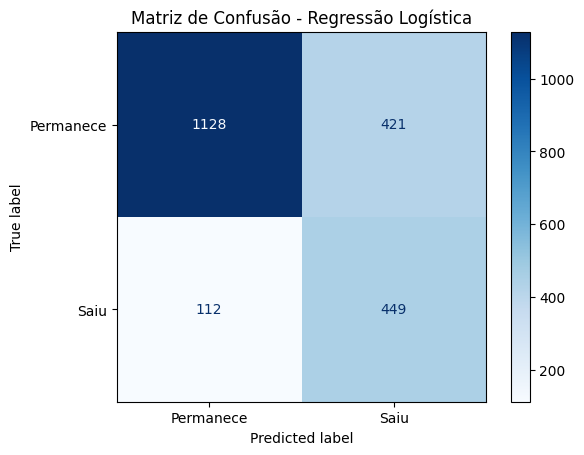

In [ ]:
y_predict_regress_log = modelo_Regressao_log.predict(X_test_scaled)

# Exibir relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_predict_regress_log, target_names=['Permanece', 'Saiu']))

# Calcular e exibir a pontuação AUC
auc_lr = roc_auc_score(y_test, modelo_Regressao_log.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC: {auc_lr:.4f}")

# Exibir a matriz de confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_predict_regress_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Permanece', 'Saiu'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

#### Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_Random_for = RandomForestClassifier(random_state=42)
modelo_Random_for.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

Relatório de Classificação:
              precision    recall  f1-score   support

   Permanece       0.83      0.89      0.86      1549
        Saiu       0.62      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110


Pontuação AUC: 0.8223

Matriz de Confusão:


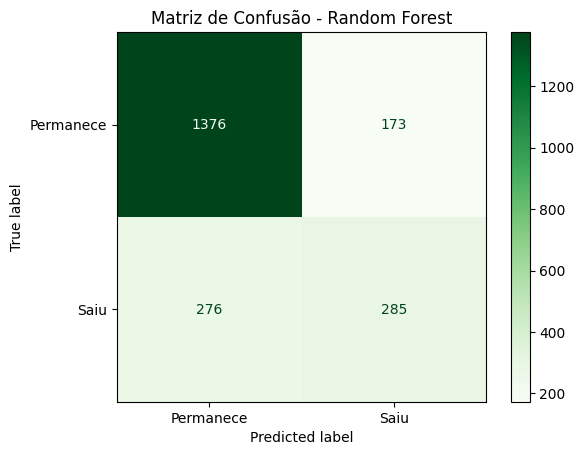

In [ ]:
y_predict_Random_for = modelo_Random_for.predict(X_test)

# Exibir relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_predict_Random_for, target_names=['Permanece', 'Saiu']))

# Calcular e exibir a pontuação AUC
auc_rf = roc_auc_score(y_test, modelo_Random_for.predict_proba(X_test)[:, 1])
print(f"\nPontuação AUC: {auc_rf:.4f}")

# Exibir a matriz de confusão
print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_predict_Random_for)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Permanece', 'Saiu'])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusão - Random Forest')
plt.show()

#### Análise crítica

**1. Regressão Logística**
- **Recall (Saiu):** **0,80** → Muito alto, identificando 80% dos clientes que realmente cancelam.  
- **Falsos Negativos:** 112 → Poucos casos de churn não detectados.  
- **Custo do desempenho:** Precisão para “Saiu” de 0,52, resultando em 421 falsos positivos (clientes previstos como churn, mas que permaneceram).  
- **Vantagem:** Alta sensibilidade para churn, crucial para estratégias de retenção.  

---
**2. Random Forest**
- **Recall (Saiu):** **0,51** → Baixo, deixando passar quase metade dos clientes que realmente cancelam.  
- **Falsos Negativos:** 276 → Perde significativamente mais casos de churn em comparação à Regressão Logística.  
- **Custo do desempenho:** Maior precisão para “Saiu” (0,62) e menos falsos positivos (173), mas à custa de menor sensibilidade.  
- **Desvantagem:** Baixa capacidade de capturar churn em grande escala.  

---

**Algum modelo apresentou overfitting ou underfitting?**

- **Regressão Logística:** Não há indícios evidentes de sobreajuste. O desempenho no conjunto de teste mantém-se estável, indicando boa capacidade de generalização.

- **Random Forest:** Apresenta indícios de subajuste para a classe “Saiu”, evidenciado pelo baixo valor de recall.

---


**Resultado**

Dado que o objetivo é **identificar o maior número possível de churn**, a **Regressão Logística** é o modelo que teve o melhor resultado.  
- Apresenta **recall** de 0,80 para “Saiu”, contra 0,51 do Random Forest.  
- Reduz significativamente os falsos negativos, aumentando as oportunidades de ações preventivas.  
- O aumento nos falsos positivos é um custo aceitável, já que o impacto de não agir sobre clientes em risco é maior do que agir sobre clientes que permaneceriam.


#### Ajustes nos modelos

> Ajuste de hiperparâmetros para o Ramdom Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo
modelo_rf_tune = RandomForestClassifier(random_state=42)

# Definir o espaço de hiperparâmetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf_tune, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_res_scaled, y_res)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibir a melhor pontuação AUC encontrada
print("Melhor pontuação AUC:", grid_search.best_score_)

# O modelo com os melhores hiperparâmetros
best_modelo_rf = grid_search.best_estimator_

Melhores hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 300}
Melhor pontuação AUC: 0.9382489066846919


Relatório de Classificação - Random Forest Otimizado:
              precision    recall  f1-score   support

   Permanece       0.85      0.85      0.85      1549
        Saiu       0.59      0.59      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110

AUC: 0.838


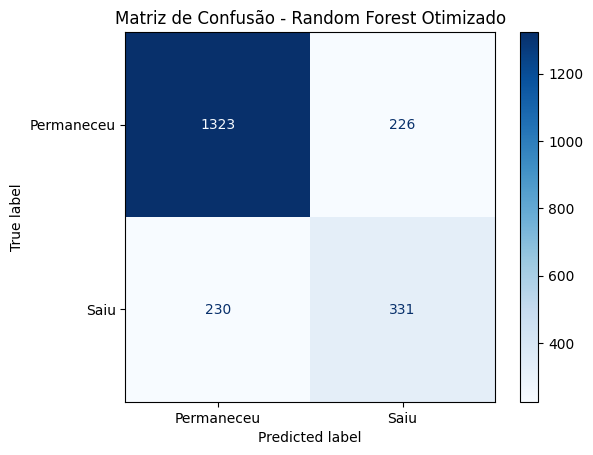

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Novo modelo Random Forest Otimizado
y_predict_otimi_rf = best_modelo_rf.predict(X_test_scaled)

print("Relatório de Classificação - Random Forest Otimizado:")
print(classification_report(y_test, y_predict_otimi_rf, target_names=['Permanece', 'Saiu']))

# Calcular e exibir a pontuação AUC para o modelo otimizado
auc_best_rf = roc_auc_score(y_test, best_modelo_rf.predict_proba(X_test_scaled)[:, 1]).round(4)
print("AUC:", auc_best_rf)

# Matriz de Confusão para o modelo otimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_otimi_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.show()

## **Análise de Importância das Variáveis**

### Regressão Logística

In [ ]:
# Obter os nomes das colunas e os coeficientes
feature_names = X_res.columns
coefficients = modelo_Regressao_log.coef_[0]

# Criar um DataFrame pandas contendo as variáveis e seus coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar o DataFrame de coeficientes para melhor visualização
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Criar um gráfico de barras interativo com Plotly Express
fig = px.bar(coef_df, x='Coefficient', y='Feature', orientation='h',
             title='Importância das Variáveis (Coeficientes) - Regressão Logística',
             color='Coefficient', color_continuous_scale='RdBu') # Alterado 'coolwarm' para 'RdBu'

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  width=1500, height=900,
                  paper_bgcolor='lightgray',  # Cor de fundo da área do papel
                  plot_bgcolor='lightgray')   # Cor de fundo da área do gráfico

fig.show()

O gráfico apresenta os **coeficientes estimados** pela Regressão Logística, que indicam a força e a direção da associação de cada variável com a probabilidade de churn.  
- **Coeficientes positivos (azuis)** → aumentam a probabilidade de churn.  
- **Coeficientes negativos (vermelhos)** → reduzem a probabilidade de churn.  
- A magnitude do coeficiente representa a intensidade dessa influência.  

---

### Principais fatores que aumentam a probabilidade de churn
1. **Charges.Total (positivo)** – Clientes com maior total de cobranças tendem a apresentar maior risco de cancelamento.  
2. **InternetService_Fiber optic** – Usuários de internet por fibra óptica demonstram tendência mais alta de churn, possivelmente por custos ou concorrência.  
3. **Contract_Month-to-month** – Contratos mensais estão fortemente associados a maior evasão, refletindo menor compromisso de longo prazo.  
4. **StreamingTV_Yes e StreamingMovies_Yes** – Serviços adicionais podem estar relacionados a perfis de clientes mais suscetíveis ao cancelamento, talvez pelo custo acumulado.  
5. **PaymentMethod_Electronic check** – Este método de pagamento se correlaciona com maior probabilidade de churn, possivelmente por perfil de cliente ou facilidade de cancelamento.  

---

### Principais fatores que reduzem a probabilidade de churn
1. **Tenure (tempo de contrato)** – Quanto maior o tempo de permanência, menor a chance de churn. Esse é o fator com maior peso negativo.  
2. **InternetService_DSL** – Usuários de DSL tendem a ter menor propensão ao cancelamento.  
3. **Contract_Two year** – Contratos de dois anos reduzem fortemente a probabilidade de churn, reforçando o papel do vínculo contratual.  
4. **MonthlyCharges (baixo coeficiente negativo)** – Menores valores mensais contribuem para maior retenção, embor

---

### Interpretação geral
O modelo reforça que **fatores contratuais e de permanência** são determinantes para retenção, enquanto **planos de curto prazo, custos totais elevados e determinados serviços adicionais** aumentam o risco de churn.  


In [ ]:
# Obter os nomes das colunas (features)
feature_names = X_res.columns

# Obter as importâncias das features do modelo Random Forest treinado
# Como usamos o modelo otimizado (best_modelo_rf), usaremos ele
feature_importances = best_modelo_rf.feature_importances_

# Criar um DataFrame pandas contendo as variáveis e suas importâncias
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenar o DataFrame de importâncias para melhor visualização
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Criar um gráfico de barras interativo com Plotly Express
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h',
             title='Importância das Variáveis - Random Forest Otimizado',
             color='Importance', color_continuous_scale='Greens')
fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  width=900, height=800,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray')

fig.show()

O gráfico exibe a **importância das variáveis** no modelo Random Forest, medida pelo impacto relativo de cada atributo na redução da impureza durante a construção das árvores de decisão. Quanto maior o valor, mais a variável contribui para as decisões do modelo.

---

### Principais fatores que aumentam a capacidade preditiva do modelo
1. **Contract_Month-to-month** – É a variável mais influente, confirmando que clientes com contrato mensal apresentam maior instabilidade e risco de churn.  
2. **PaymentMethod_Electronic check** – Forma de pagamento associada a um perfil mais propenso ao cancelamento.  
3. **InternetSecurity_No** – Ausência de segurança na internet é um indicativo relevante para previsão de churn.  
4. **TechSupport_No** – Falta de suporte técnico correlaciona-se com maior probabilidade de cancelamento.  
5. **Tenure (tempo de contrato)** – Tempo total como cliente impacta fortemente na retenção, sendo um fator protetor contra o churn.  
6. **Charges.Total** – Valor total gasto pelo cliente influencia o risco de saída, possivelmente ligado a custos acumulados.  

---

### Fatores com influência moderada
- **Charges.Monthly** – Custo mensal tem impacto, mas menor do que o custo total.  
- **InternetService_Fiber optic** – Tipo de serviço de internet relacionado ao risco de cancelamento.  
- **Contract_Two year** – Contratos longos contribuem para reduzir o churn.  
- **PaperlessBilling** – Fatura digital apresenta associação moderada com o comportamento de cancelamento.  

---

### Interpretação geral
O modelo Random Forest prioriza variáveis relacionadas a **tipo de contrato**, **forma de pagamento** e **serviços adicionais** como principais preditores de churn.  

## **Conclusão**  

### 1) Síntese dos resultados  
Durante o projeto, foram testados múltiplos modelos de classificação para prever a evasão de clientes, com atenção especial à detecção da classe “Saiu” (churn). Entre os modelos avaliados, a **Regressão Logística com padronização e balanceamento SMOTE** se destacou por apresentar **recall de 0,80** para a classe churn, superando a **Random Forest otimizada**, que obteve 0,59.  

O recall elevado significa que o modelo é capaz de identificar a grande maioria dos clientes que irão cancelar, oferecendo à Telecom X a oportunidade de agir preventivamente. Ainda que a precisão seja menor, o ganho na detecção precoce compensa, considerando o custo e impacto de perder clientes de alto valor.

---

### 2) Principais fatores que influenciam a evasão  
A análise de coeficientes e importância das variáveis revelou padrões claros de comportamento:  

1. **Contrato “Month-to-month”** — o fator de risco mais expressivo; clientes sem fidelização são mais voláteis e suscetíveis à concorrência.  
2. **Método de pagamento “Electronic check”** — associado a perfis menos fidelizados e maior probabilidade de cancelamento.  
3. **Ausência de Online Security** — sinal de menor engajamento e percepção de valor.  
4. **Ausência de Tech Support** — indica clientes menos conectados à empresa e com maior risco de insatisfação.  
5. **Tenure baixo** — clientes recentes ainda não consolidaram confiança na marca.  
6. **Alto gasto total acumulado** — pode gerar sensibilidade a preço ou percepção de custo excessivo.  
7. **Serviço de internet via Fiber optic** — apesar de tecnologicamente avançado, apresentou associação com maior churn, possivelmente por expectativas elevadas ou questões de preço.  

Esses insights são consistentes com padrões observados no setor, em que **fidelização, percepção de valor e experiência inicial** são determinantes na retenção.

---

### 3) Estratégias de retenção recomendadas  
Com base nos fatores identificados e visando reduzir a evasão, recomenda-se um conjunto integrado de ações estratégicas:  

- **Programas de fidelização para contratos mensais**: migrar clientes para planos anuais com benefícios claros (descontos progressivos, upgrades temporários, bônus de dados).  
- **Conversão de métodos de pagamento**: incentivar a troca de “Electronic check” para débito ou crédito automático, oferecendo cashback ou benefícios exclusivos.  
- **Adesão a serviços complementares**: oferecer Online Security e Tech Support a preços reduzidos ou gratuitamente nos primeiros meses para clientes que não possuem esses add-ons.  
- **Campanhas de retenção para novos clientes**: programas de onboarding personalizado, acompanhamento nos primeiros 90 dias e check-ins de satisfação para clientes com tenure baixo.  
- **Revisão de preços para clientes com alto gasto total**: oferecer planos mais ajustados ao perfil de uso ou descontos de lealdade para evitar evasão por sensibilidade ao preço.  
- **Monitoramento e reforço de qualidade para clientes Fiber optic**: auditorias técnicas, comunicação proativa sobre desempenho e benefícios adicionais para mitigar insatisfação.  
- **Segmentação de clientes de alto risco**: priorizar contatos preventivos e ofertas para grupos que acumulam múltiplos fatores de risco (ex.: contrato mensal + ausência de add-ons + tenure baixo).  
- **Campanhas de valorização da marca**: reforçar mensagens sobre confiabilidade, suporte e benefícios exclusivos, criando barreiras emocionais à troca de fornecedor.  

---

### 4) Valor estratégico da análise  
O trabalho não apenas identificou padrões que explicam a evasão, mas também traduziu os resultados em **ações concretas de negócio**. A detecção antecipada do churn, aliada à compreensão dos fatores de risco, permite que a Telecom X **otimize recursos**, direcionando esforços de retenção onde o retorno potencial é maior.  

Ao integrar essas práticas, a empresa tem potencial para **reduzir significativamente a taxa de cancelamento**, aumentar o **Lifetime Value (LTV)** da base e fortalecer a **vantagem competitiva** frente ao mercado.
